In [ ]:
# Generate a sysnthetic dataset of marine ecological dataset to contain
# '''
#20 marine zones (Z1 to Z20)
# 6 ecological policies
# Binary values (0 or 1) indicating policy presence, randomly assigned using a bionomial distribution
# '''

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

In [ ]:
# Generate dataset

np.random.seed(42)  # for reproducibility
num_zones = 20
policies = [
    "coral_protection",
    "fishing_ban",
    "turtle_nesting",
    "oil_drilling_ban",
    "marine_sanctuary",
    "mangrove_protection"
]

In [ ]:
# Each policy is designed to have a 50% chance of being applied to a zone

data_matrix = np.random.binomial(1, 0.5, size=(num_zones, len(policies)))
zone_ids = [f"Z{i+1}" for i in range(num_zones)]

In [4]:
# Create DataFrame
df = pd.DataFrame(data_matrix, columns=policies, index=zone_ids)
df.index.name = "Zone_ID"

In [5]:
df

,coral_protection,fishing_ban,turtle_nesting,oil_drilling_ban,marine_sanctuary,mangrove_protection
Zone_ID,,,,,,
Z1,0,1,1,1,0,0
Z2,0,1,1,1,0,1
Z3,1,0,0,0,0,1
Z4,0,0,1,0,0,0
Z5,0,1,0,1,1,0
Z6,1,0,0,1,1,1
Z7,0,0,1,0,0,0
Z8,0,1,0,1,0,1
Z9,1,0,1,1,1,1


In [ ]:
# Save data to CSV
df.to_csv("generated_marine_zones.csv")

In [8]:
# Step 2: Clustering analysis
# ---------------------------
# Compute Jaccard distance
jaccard_dist = pdist(df, metric="jaccard")

In [9]:
# Perform hierarchical clustering using complete linkage
linked = linkage(jaccard_dist, method="complete")

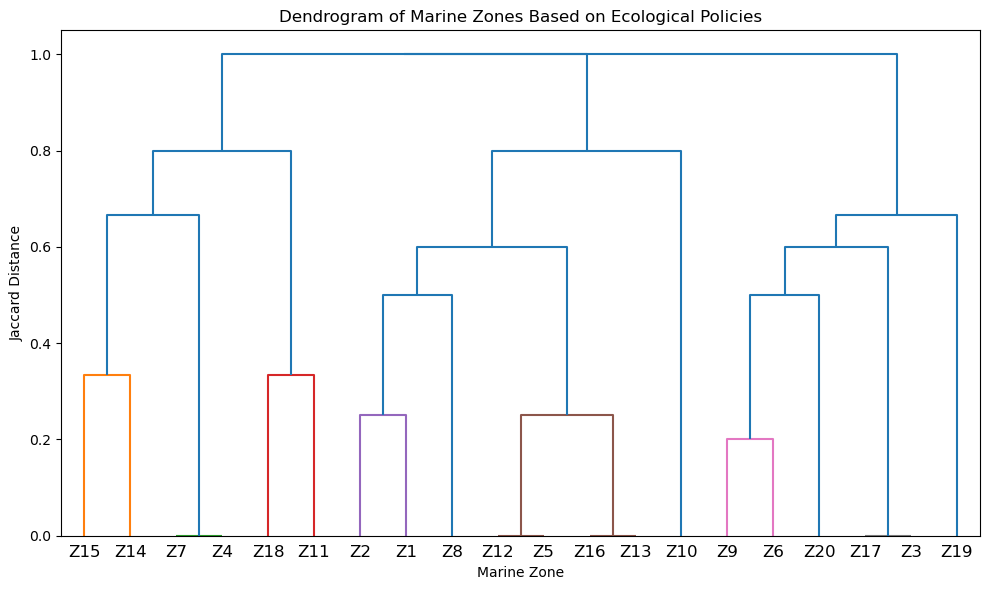

In [10]:
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           labels=df.index.tolist(),
           distance_sort="descending",
           color_threshold=0.5)
plt.title("Dendrogram of Marine Zones Based on Ecological Policies")
plt.xlabel("Marine Zone")
plt.ylabel("Jaccard Distance")
plt.tight_layout()
plt.savefig("dendrogram_marine_zones.png")
plt.show()

In [11]:
# Optional: Assign cluster labels
cluster_labels = fcluster(linked, t=0.5, criterion='distance')
df["Cluster"] = cluster_labels

In [12]:
# Save final clustered data
df.to_csv("clustered_marine_zones.csv")

In [13]:
#Cluster Profiling
# -----------------------------
cluster_summary = df.groupby("Cluster")[policies].mean()
print("Cluster Policy Averages:\\n", cluster_summary)

Cluster Policy Averages:\n          coral_protection  fishing_ban  turtle_nesting  oil_drilling_ban  \
Cluster                                                                    
1                     1.0     0.000000        0.000000          0.000000   
2                     1.0     0.333333        0.666667          0.666667   
3                     0.0     0.000000        0.000000          0.000000   
4                     0.0     1.000000        0.500000          1.000000   
5                     0.0     1.000000        0.666667          1.000000   
6                     1.0     1.000000        0.000000          0.000000   
7                     0.0     0.500000        1.000000          0.000000   
8                     0.0     0.000000        1.000000          0.000000   
9                     0.0     0.000000        1.000000          1.000000   

         marine_sanctuary  mangrove_protection  
Cluster                                         
1                     0.0             

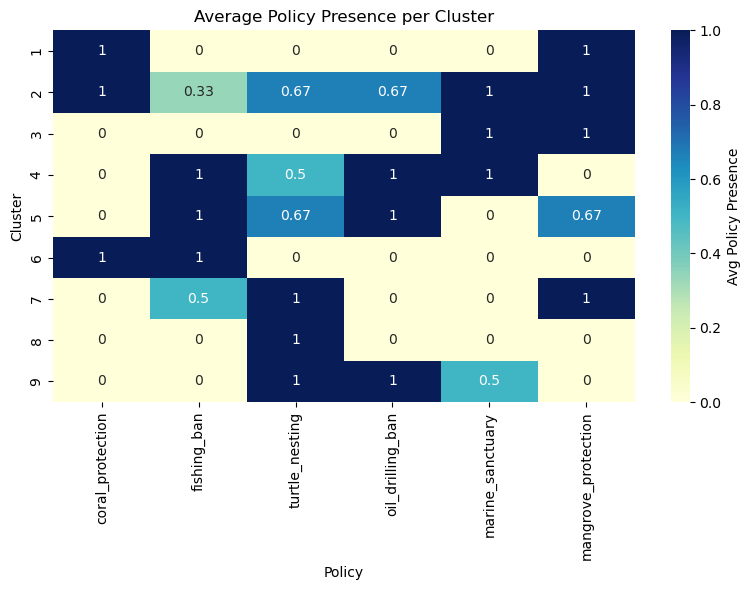

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Avg Policy Presence'})
plt.title("Average Policy Presence per Cluster")
plt.xlabel("Policy")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig("cluster_policy_heatmap.png")
plt.show()

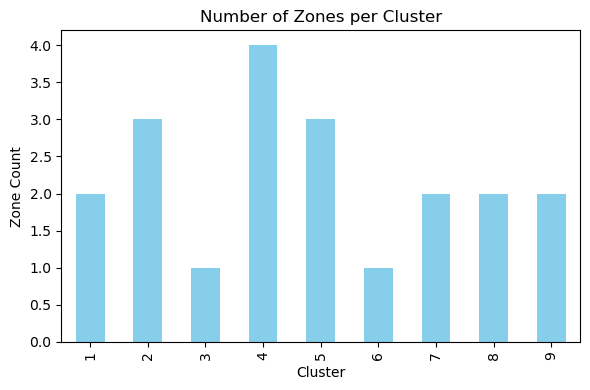

In [17]:
# Step 4: Cluster Size Plot
# -----------------------------
plt.figure(figsize=(6, 4))
df["Cluster"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Number of Zones per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Zone Count")
plt.tight_layout()
plt.savefig("cluster_sizes.png")
plt.show()